In [40]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [11]:
tree = ET.parse('collection/Annotations/users/luizifgueiredo/olhodelombo/lombo/1100208028.xml')

In [12]:
root = tree.getroot()

In [97]:
x = []
y = []
for r in root.iter('x'):
    x.append(r.text)
for r in root.iter('y'):
    y.append(r.text)

pts = np.array([[int(a),int(b)] for(a,b) in zip(x,y)])

In [91]:
shape = np.zeros(2,dtype=np.int)
shape[0] = int([a.text for a in root.iter('nrows')][0])
shape[1] = int([a.text for a in root.iter('ncols')][0])

In [92]:
shape

array([600, 800])

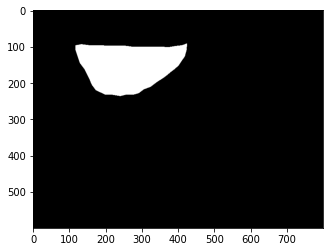

In [99]:
canvas = np.zeros((shape[0], shape[1]), np.uint8)
cv2.drawContours(canvas, [pts],-1, (255), -1)
plt.imshow(canvas,cmap='gray')
plt.show()

In [102]:
im_orig = cv2.imread('original/1100208028.bmp')

(600, 800, 3)

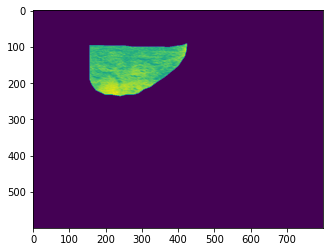

In [105]:
plt.imshow(im_orig[:,:,0]*canvas)

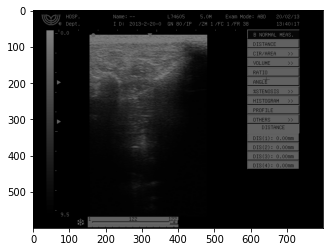

In [106]:
plt.imshow(im_orig)

In [107]:
help(cv2.imwrite)

Help on built-in function imwrite:

imwrite(...)
    imwrite(filename, img[, params]) -> retval
    .   @brief Saves an image to a specified file.
    .   
    .   The function imwrite saves the image to the specified file. The image format is chosen based on the
    .   filename extension (see cv::imread for the list of extensions). In general, only 8-bit
    .   single-channel or 3-channel (with 'BGR' channel order) images
    .   can be saved using this function, with these exceptions:
    .   
    .   - 16-bit unsigned (CV_16U) images can be saved in the case of PNG, JPEG 2000, and TIFF formats
    .   - 32-bit float (CV_32F) images can be saved in PFM, TIFF, OpenEXR, and Radiance HDR formats;
    .     3-channel (CV_32FC3) TIFF images will be saved using the LogLuv high dynamic range encoding
    .     (4 bytes per pixel)
    .   - PNG images with an alpha channel can be saved using this function. To do this, create
    .   8-bit (or 16-bit) 4-channel image BGRA, where the alpha c